In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('2019-Nov.csv')

In [3]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [4]:
data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   event_time     67501979 non-null  object 
 1   event_type     67501979 non-null  object 
 2   product_id     67501979 non-null  int64  
 3   category_id    67501979 non-null  int64  
 4   category_code  45603808 non-null  object 
 5   brand          58277901 non-null  object 
 6   price          67501979 non-null  float64
 7   user_id        67501979 non-null  int64  
 8   user_session   67501969 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [5]:
data.describe()

,product_id,category_id,price,user_id
count,6.750198e+07,6.750198e+07,6.750198e+07,6.750198e+07
mean,1.251406e+07,2.057898e+18,2.924593e+02,5.386397e+08
std,1.725741e+07,2.012549e+16,3.556745e+02,2.288516e+07
min,1.000365e+06,2.053014e+18,0.000000e+00,1.030022e+07
25%,1.305977e+06,2.053014e+18,6.924000e+01,5.164762e+08
50%,5.100568e+06,2.053014e+18,1.657700e+02,5.350573e+08
75%,1.730075e+07,2.053014e+18,3.603400e+02,5.610794e+08
max,1.000286e+08,2.187708e+18,2.574070e+03,5.799699e+08


In [6]:
counts = data['category_code'].value_counts().reset_index().rename(columns={'index': 'category_code', 'category_code': 'count'})

In [7]:
counts

,category_code,count
0,electronics.smartphone,16375000
1,electronics.video.tv,2208046
2,computers.notebook,2180554
3,electronics.clocks,2086966
4,apparel.shoes,1886890
...,...,...
124,apparel.shorts,652
125,construction.tools.screw,184
126,appliances.kitchen.fryer,108
127,country_yard.furniture.bench,2


In [8]:
import matplotlib
import matplotlib.pyplot as plt   #importing matplotlib and seaborn library for data visualization
import seaborn as sns

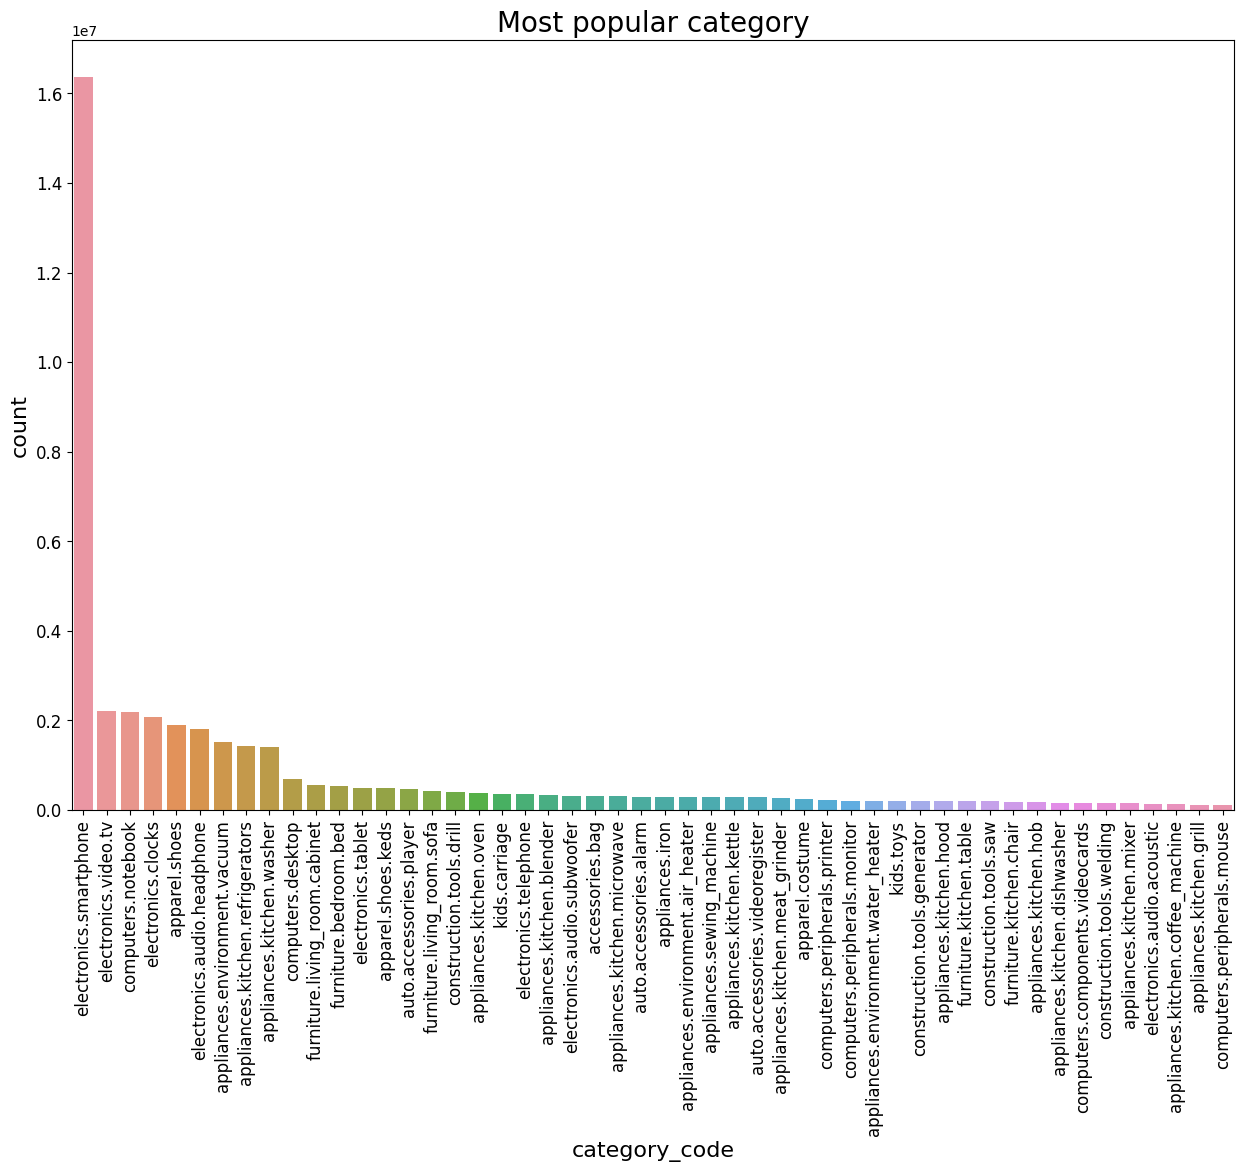

In [9]:
plt.figure(figsize=(15, 10))
sns.barplot(x="category_code", y="count", data = counts, order=counts.sort_values('count', ascending=False)['category_code'].head(50))
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most popular category", fontsize=20)
plt.xlabel("category_code", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

In [10]:
df = data[data['category_code'] == 'electronics.smartphone']
brands_count = df['brand'].value_counts().reset_index()
brands_count.columns = ['brand', 'count']

In [11]:
brands_count

,brand,count
0,samsung,5316962
1,apple,4658729
2,xiaomi,3331784
3,huawei,1237930
4,oppo,811698
5,meizu,201703
6,vivo,159327
7,oneplus,110173
8,honor,107840
9,nokia,94164


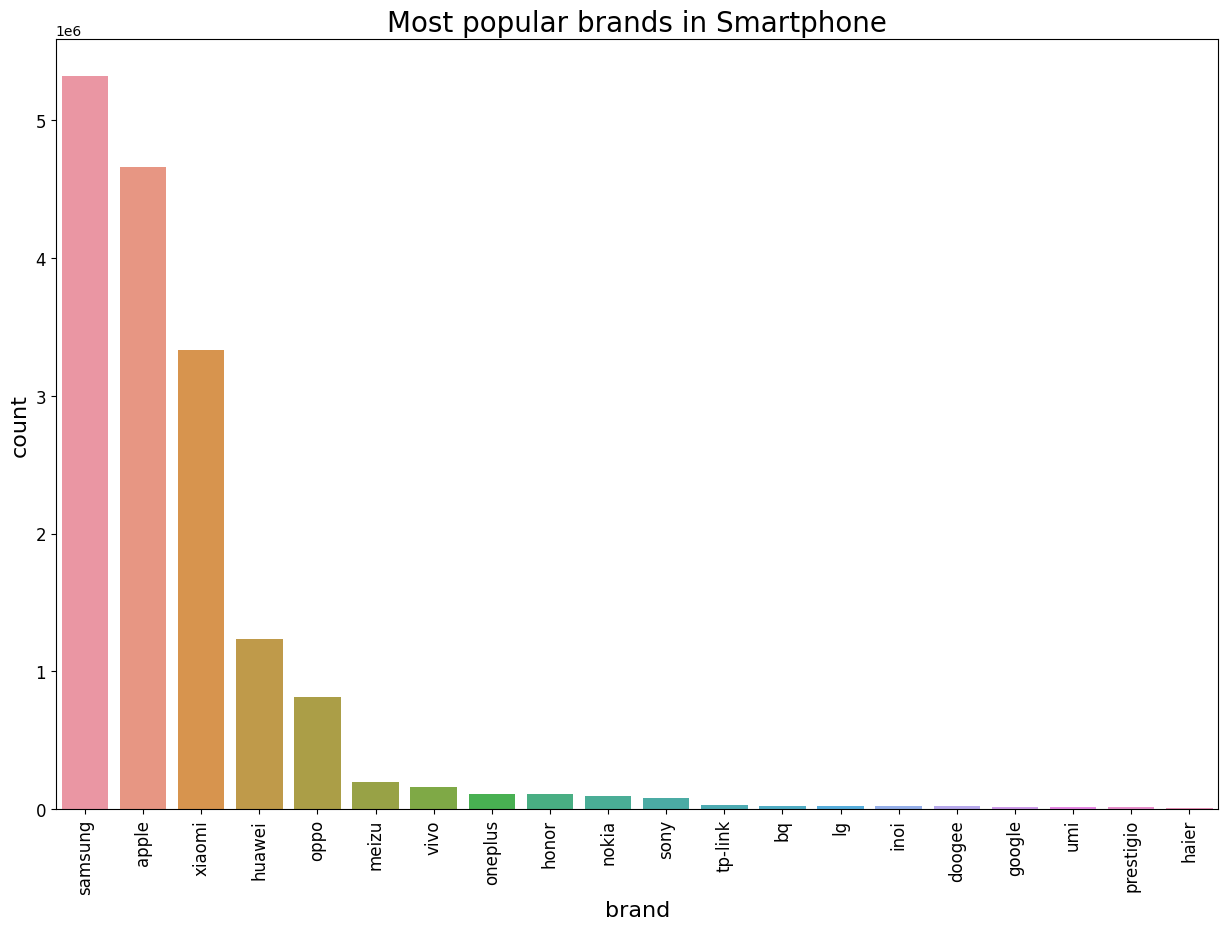

In [12]:
plt.figure(figsize=(15, 10))
sns.barplot(x="brand", y="count", data = brands_count , order=brands_count.sort_values('count', ascending=False)['brand'].head(20))
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most popular brands in Smartphone", fontsize=20)
plt.xlabel("brand", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

In [13]:
counts_user = data['user_id'].value_counts().reset_index().rename(columns={'index': 'user_id', 'user_id': 'count'})

Note that there could be bots influencing data

In [14]:
counts_user

,user_id,count
0,568778435,22929
1,569335945,14810
2,568818636,6171
3,512475445,6111
4,512365995,6042
...,...,...
3696112,573146032,1
3696113,566812808,1
3696114,573146061,1
3696115,573145629,1


In [15]:
total_prices = data.groupby('user_id')['price'].sum().reset_index().rename(columns={'price': 'total_price'})

In [16]:
total_prices

,user_id,total_price
0,10300217,40.54
1,29515875,3026.73
2,31198833,6426.18
3,34916060,295.94
4,41798457,945.97
...,...,...
3696112,579969605,167.29
3696113,579969658,149.30
3696114,579969711,625.41
3696115,579969767,329.14


In [17]:
user_data = pd.merge(counts_user,total_prices,on = "user_id")

In [18]:
user_data

,user_id,count,total_price
0,568778435,22929,5187451.93
1,569335945,14810,1655685.84
2,568818636,6171,1075817.05
3,512475445,6111,684750.46
4,512365995,6042,2263807.20
...,...,...,...
3696112,573146032,1,822.93
3696113,566812808,1,385.83
3696114,573146061,1,83.52
3696115,573145629,1,190.22


In [19]:
data.loc[data["user_id"] == 568778435]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
11632564,2019-11-08 03:11:13 UTC,view,1004230,2053013555631882655,electronics.smartphone,apple,1106.46,568778435,0d2760f1-e777-4443-b310-9c222afb0ec2
11632910,2019-11-08 03:11:33 UTC,view,5100572,2053013553341792533,electronics.clocks,apple,429.53,568778435,0d2760f1-e777-4443-b310-9c222afb0ec2
11651934,2019-11-08 03:28:57 UTC,view,5100572,2053013553341792533,electronics.clocks,apple,429.53,568778435,7a7183a0-43d5-48fb-ae90-16313cdb3689
11696605,2019-11-08 04:05:12 UTC,view,17301480,2053013553853497655,NaN,afnan,52.80,568778435,33f332f8-5c43-416b-8970-da4babff756b
11696608,2019-11-08 04:05:12 UTC,view,17301478,2053013553853497655,NaN,NaN,29.90,568778435,6a594c92-69cd-4be9-8cee-d0df81076364
...,...,...,...,...,...,...,...,...,...
64668731,2019-11-29 10:34:01 UTC,view,4501343,2053013563877884791,appliances.kitchen.hob,bosch,686.99,568778435,7f45d4a3-b74f-4e1c-a2c6-0d4306e9415e
64668760,2019-11-29 10:34:02 UTC,view,4501043,2053013563877884791,appliances.kitchen.hob,hansa,202.24,568778435,b40f8adc-d548-492a-b795-8f59ef957718
65643175,2019-11-29 19:30:27 UTC,view,1306832,2053013558920217191,computers.notebook,lenovo,772.19,568778435,5debb1f0-8a4b-4f27-8ee4-de6fe6234083
66896627,2019-11-30 14:51:02 UTC,view,1306832,2053013558920217191,computers.notebook,lenovo,772.19,568778435,dbddc153-634c-c694-0c14-5b668cacfd96


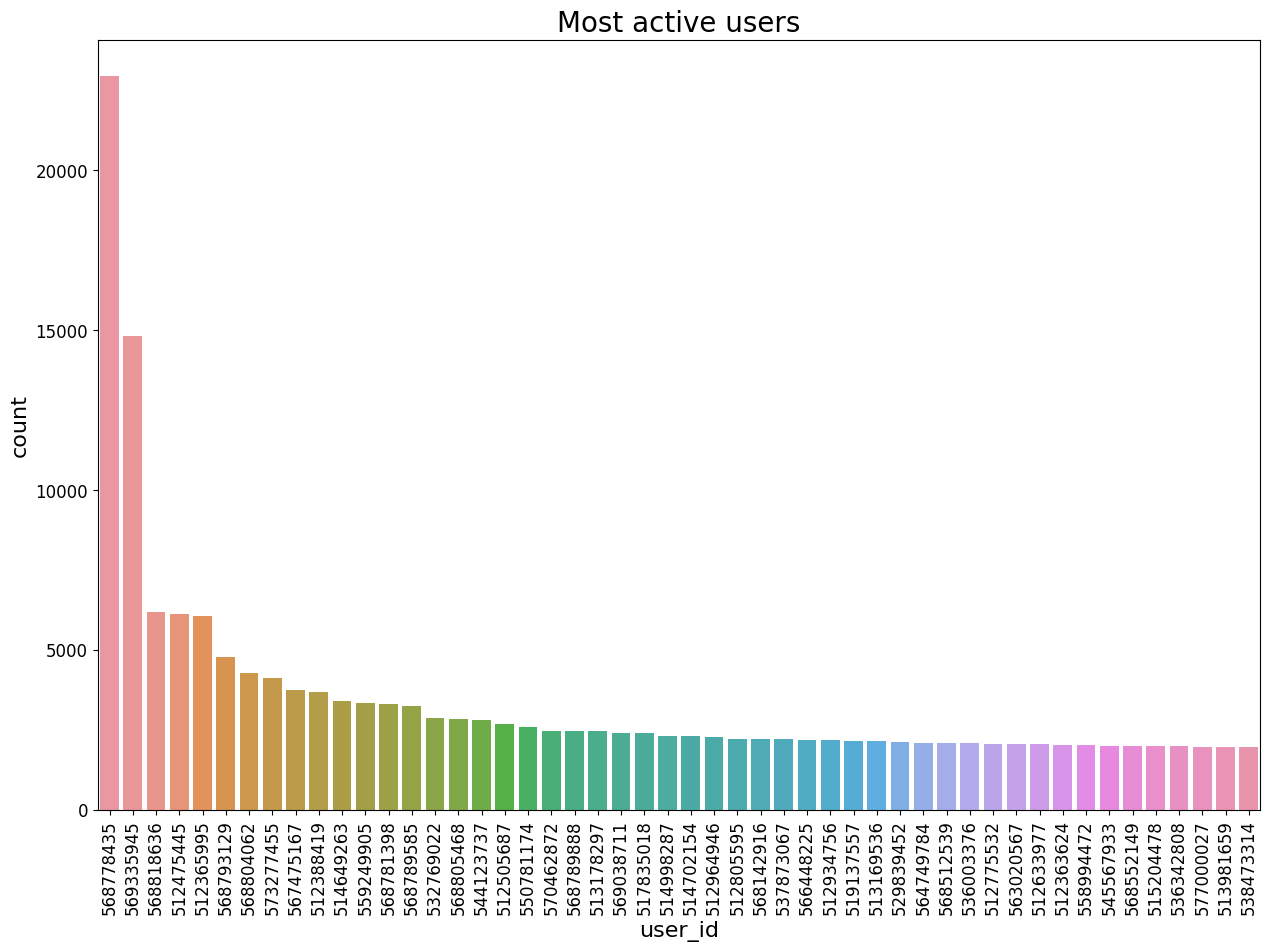

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x="user_id", y="count", data = user_data , order=user_data.sort_values('count', ascending=False)['user_id'].head(50))
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most active users", fontsize=20)
plt.xlabel("user_id", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

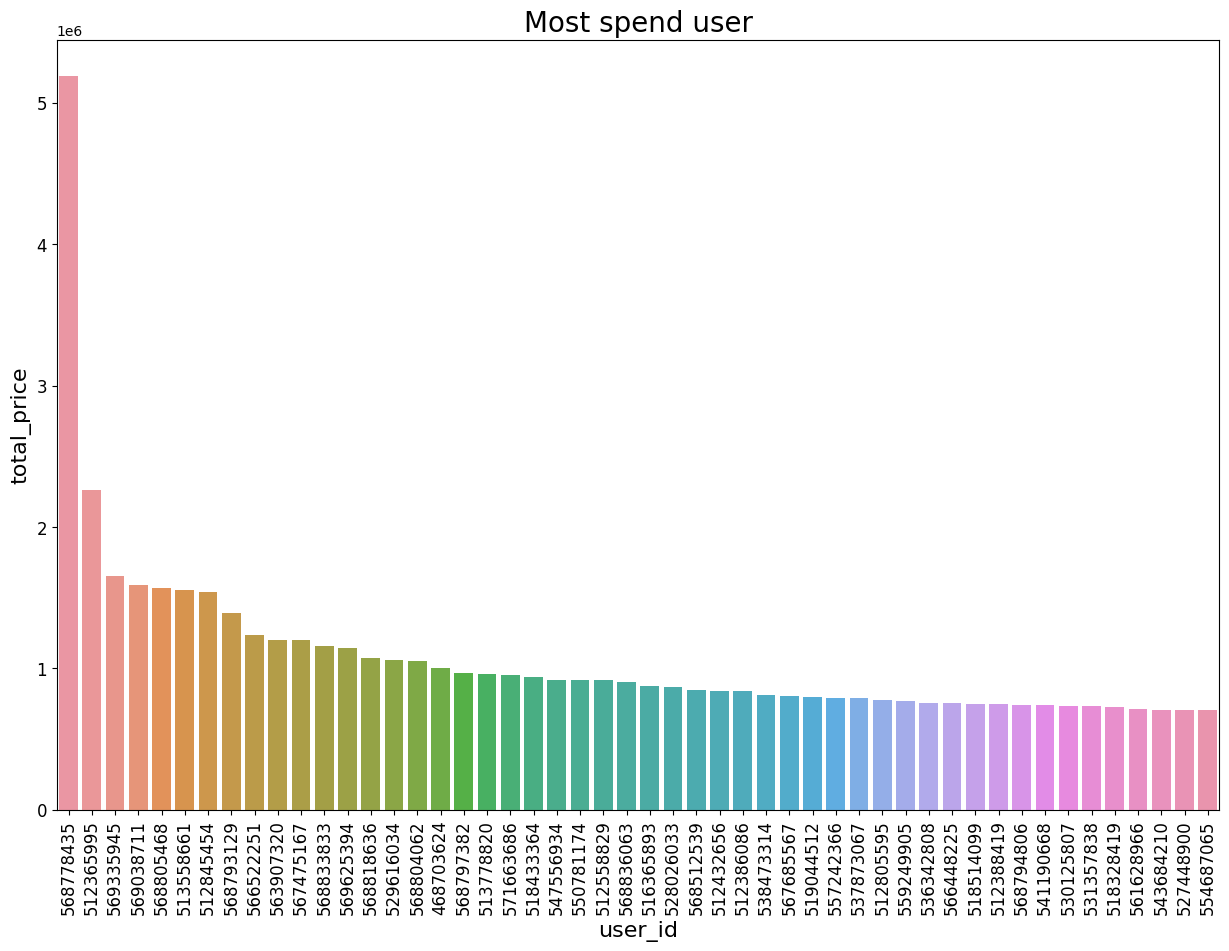

In [21]:
plt.figure(figsize=(15, 10))
sns.barplot(x="user_id", y="total_price", data = user_data , order=user_data.sort_values('total_price', ascending=False)['user_id'].head(50))
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most spend user", fontsize=20)
plt.xlabel("user_id", fontsize=16)
plt.ylabel("total_price", fontsize=16)
plt.show()

In [22]:
purchased_products = data.loc[(data["event_type"] == 'purchase'), ['user_id', 'event_type', 'product_id', 'price']]

In [23]:
counts_purchased_product = purchased_products['product_id'].value_counts().reset_index().rename(columns={'index': 'product_id', 'product_id': 'count'})

In [24]:
counts_purchased_product

,product_id,count
0,1004856,32321
1,1004767,22613
2,1005115,22244
3,4804056,17800
4,1004833,13486
...,...,...
52049,11500480,1
52050,100005128,1
52051,12710096,1
52052,52900030,1


In [25]:
data.loc[(data["product_id"] == 1004856) & (data["event_type"] == 'purchase')]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
707,2019-11-01 00:04:51 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d
1657,2019-11-01 00:11:15 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,513645631,61ceaf50-820a-4858-9a68-bab804d47a22
3949,2019-11-01 00:26:01 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,552335155,68886270-f06a-46db-8885-73230c0b90db
6292,2019-11-01 00:38:09 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562301215,340bf209-0494-4088-bdd1-da3a835d7fbd
9962,2019-11-01 00:55:52 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,534820779,2d549977-4b06-409d-b47d-2563359a5d7f
...,...,...,...,...,...,...,...,...,...
67497477,2019-11-30 23:32:16 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,124.11,558435058,e428399b-c52c-46f0-a12b-4c492bf737a3
67499624,2019-11-30 23:44:56 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,124.11,515162380,83572206-626a-47e0-be4c-f0fcadb49814
67500432,2019-11-30 23:49:23 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,124.11,579966375,b9a6c805-1b4c-4c46-9a49-95dfbcf82750
67501003,2019-11-30 23:53:04 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,124.11,567950899,004cd693-5f13-4e07-85af-6b7d9242798c


In [26]:
import datetime

In [27]:
data["event_time"] = pd.to_datetime(data["event_time"])
data["day"] = data["event_time"].dt.day
data["hour"] = data["event_time"].dt.hour

In [28]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,hour
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,1,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,1,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,1,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,1,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58+00:00,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b,30,23
67501975,2019-11-30 23:59:58+00:00,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359,30,23
67501976,2019-11-30 23:59:59+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,30,23
67501977,2019-11-30 23:59:59+00:00,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0,30,23


In [29]:
day_count = data.groupby(data['day'])['event_type'].count().reset_index(name='count')

In [30]:
day_count

,day,count
0,1,1445360
1,2,1555538
2,3,1567774
3,4,1793128
4,5,1717244
5,6,1694821
6,7,1796833
7,8,1896402
8,9,1877906
9,10,1940575


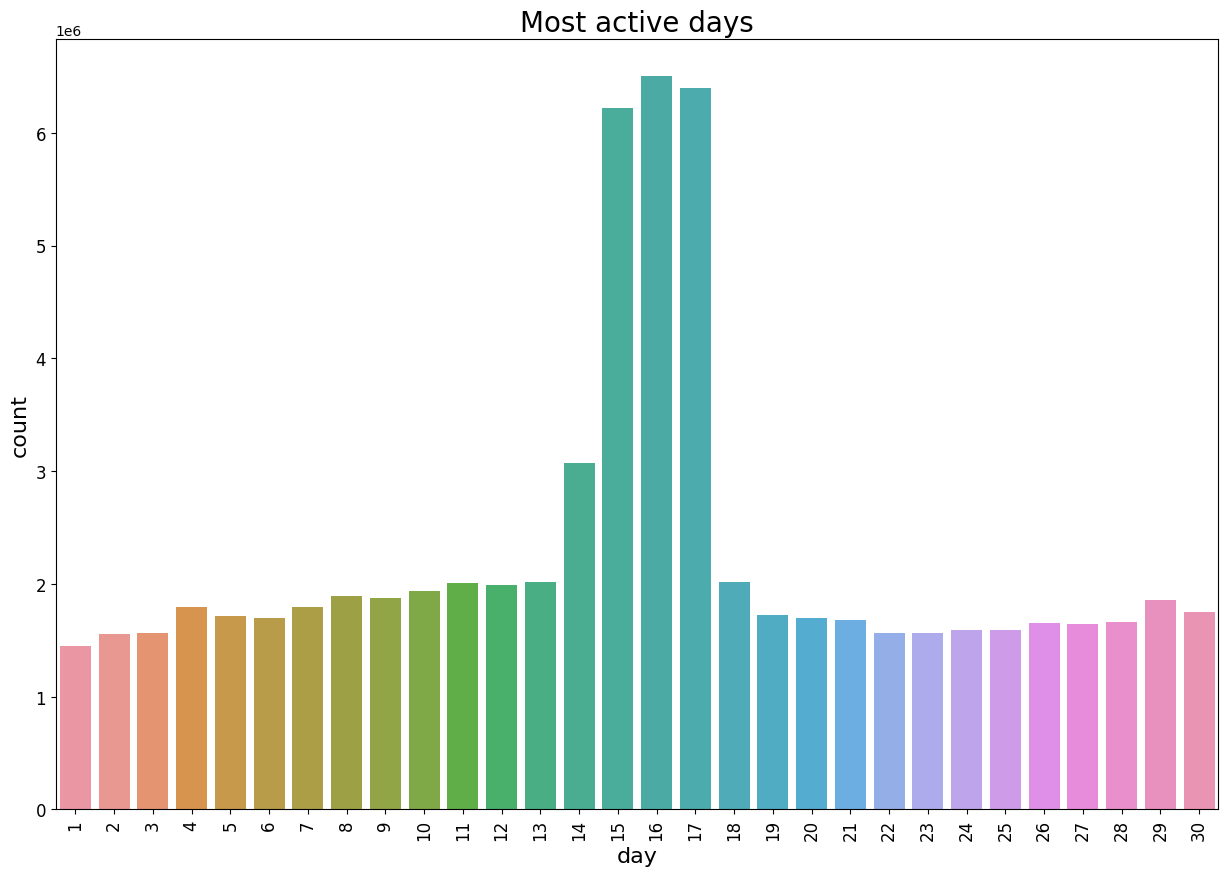

In [31]:
plt.figure(figsize=(15, 10))
sns.barplot(x="day", y="count", data = day_count , order=day_count.sort_values('day', ascending=True)['day'].head(50))
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most active days", fontsize=20)
plt.xlabel("day", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

In [32]:
hour_count = data.groupby(data['hour'])['event_type'].count().reset_index(name='count')

In [33]:
hour_count

,hour,count
0,0,448734
1,1,843397
2,2,1676249
3,3,2399278
4,4,3066909
5,5,3444239
6,6,3554901
7,7,3584742
8,8,3689021
9,9,3653758


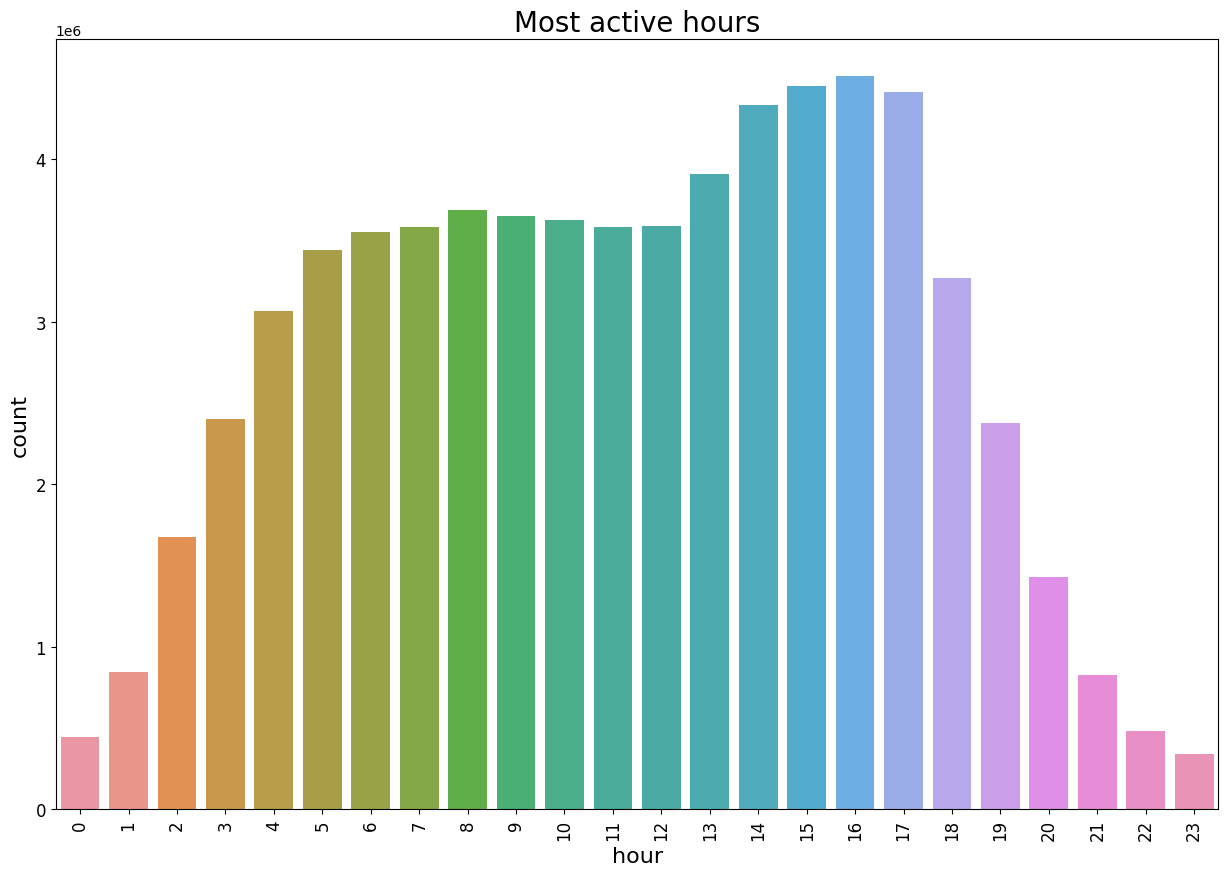

In [34]:
plt.figure(figsize=(15, 10))
sns.barplot(x="hour", y="count", data = hour_count , order=hour_count.sort_values('hour', ascending=True)['hour'].head(50))
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most active hours", fontsize=20)
plt.xlabel("hour", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()